<a href="https://colab.research.google.com/github/nataovaz/Cluster-Agrupamento_Espectral_Hierarquico/blob/main/Importar_Dados_Curso_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso Básido de Python - Leitura de Dados







In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
#Carregando dados
df = pd.read_csv("https://pycourse.s3.amazonaws.com/Data.csv")

In [ ]:
#Plotando os dados
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Este **dataset** contém 4 colunas:


*   **Country:** variável categórica
*   **Age:** variável numérica com dados faltantes
*   **Salary:** variável numérica com dados faltantes
*   **Purchased:** variável-resposta caregórica




In [ ]:
df.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

#Visualização de dados numéricos

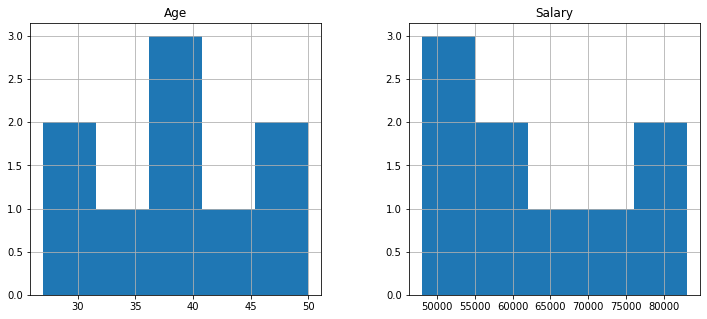

In [ ]:
#histograma
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
df.hist(column='Age', ax=ax[0], bins=5)
df.hist(column='Salary', ax=ax[1], bins=5)
plt.show()

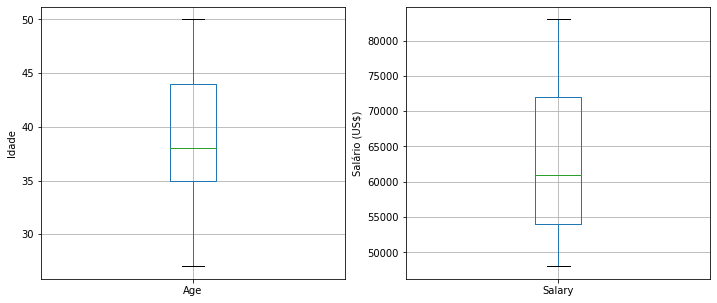

In [ ]:
#boxplot
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
df.boxplot(column='Age', ax=ax[0])
ax[0].set_ylabel('Idade')
df.boxplot(column='Salary', ax=ax[1])
ax[1].set_ylabel('Salário (US$)')
plt.show()

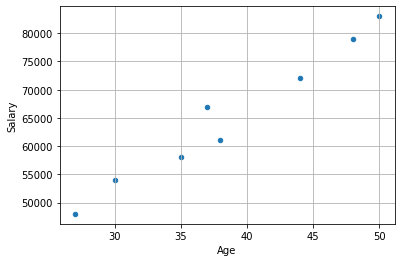

In [ ]:
#scatter plot
df.plot.scatter(x='Age', y='Salary', grid='on');

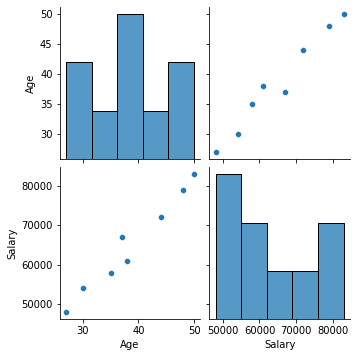

In [ ]:
#seaborn para visualização automática
sns.pairplot(data=df[['Age','Salary']], diag_kind='hist')

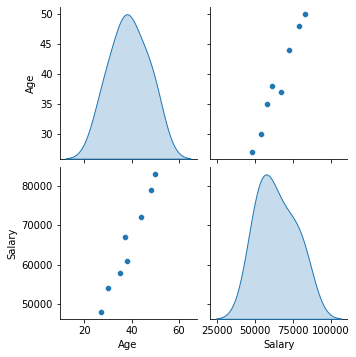

In [ ]:
# seaborn para visualização automática
sns.pairplot(data=df[['Age', 'Salary']], diag_kind='kde');

In [ ]:
sns.pairplot?

#Lidando com dados faltantes
As colunas **Age** e **Salary** apresentam dados faltantes, representado pelo valor nulo *NaN*. Quando isso ocorrer, algumas estratégias deve ser usada para que as amostras possam ser usadas pelo modelo.

In [12]:
#Importante a classe de tratamento para dados faltantes
from sklearn.impute import SimpleImputer

In [13]:
#Formatando o print do numpy
np.set_printoptions(precision=4, suppress=True)

In [16]:
SimpleImputer?

In [17]:
#Trocando os dados faltantes (NaN) pela média da coluna
imputer = SimpleImputer(strategy='median')
num_cols_mean = imputer.fit_transform(df[['Age','Salary']])
num_cols_mean

array([[   44., 72000.],
       [   27., 48000.],
       [   30., 54000.],
       [   38., 61000.],
       [   40., 61000.],
       [   35., 58000.],
       [   38., 52000.],
       [   48., 79000.],
       [   50., 83000.],
       [   37., 67000.]])

In [ ]:
#substituindo no dataframe
df[['Age', 'Salary']] = num_cols_mean
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


1 - Gráfico em Barras

In [ ]:
df_agrupado_pelo_country = df.groupby('Country').agg({'Salary': np.mean})

In [ ]:
px.bar(df_agrupado_pelo_country, x='Salary')

2 - Gráfico de Dispersão

In [ ]:
px.scatter(df, x='Salary', y='Age', color='Purchased')